# Projet : Préparation et analyse des données

## Table des matières
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Étape 1 : collecte de données</a></li>
<li><a href="#evaluation">Étape 2 : évaluation des données</a></li>
<li><a href="#netoyage">Étape 3 : Nétoyage des données</a></li>
<li><a href="#stockage">Étape 4 : stockage des données</a></li>
<li><a href="#analyse">Étape 5 :analyser et visualiser les données</a></li>
<li><a href="#conclusions">Conclusion</a></li>
<li><a href="#rapports">Étape 6 : rapports</a></li>
<li><a href="#reference">reference</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Dans ce projet, nous recueillerons des données provenant de diverses sources et dans divers formats.
> puis nous évaluerons la qualité et l'ordre des données, puis les nettoierons.
> Enfin nous réaliserons des analyses suivies de quelques visualisations.

> Pour mener à bien cette préparation et cette analyse des données,
> suivons quelques étapes :

- Étape 1 : collecte de données

- Étape 2 : évaluation des données

- Étape 3 : nettoyage des données

- Étape 4 : stockage des données

- Étape 5 : analyser et visualiser les données

- Étape 6 : rapports

<a id='wrangling'></a>
# Étape 1 : Collecte de données
> Dans cette étape, nous collecterons les trois bases de données dont nous avons besoin pour notre analyse des données.

- la première base de données nous a été proposée, nous venons de la télécharger en cliquant sur un lien (twitter_archive_enhanced.csv).
- la deuxième base de données sera téléchargeable par programmation grâce au lien qui nous a été donné (image-predictions.tsv).
- la troisième base de données sera téléchargée à l'aide de l'API Twitter (Data_supplementary_API_Twitter.csv).

In [75]:
# importer des packages
import requests
import pandas as pd
import numpy as np
import tweepy
import json
from tweepy import OAuthHandler
from timeit import default_timer as timer
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#téléchargez le deuxième jeu de données par programmation grâce à l'url qui nous est donnée
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv' 
response = requests.get(url) 

# Enregistrer le fichier tsv 
with open("image_predictions.tsv", mode='wb') as file : 
    file.write(response.content)

In [76]:
# lire la base de données
twitter_archive = pd.read_csv('twitter_archive_enhanced.csv')
image_prediction = pd.read_csv('image_predictions.tsv',sep='\t')

In [ ]:
# télécharger le troisième jeu de données grâce à l'API Twitter
#clé api
consumer_key = 'cle api'
consumer_secret = 'secret api'
access_token = 'token key'
access_secret = 'token secret'

# authentification
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

#determinons le nombre de ligne de notre base twitter_archive
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

count = 0
fails_dict = {}
start = timer()

with open('tweet__json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepyException as e:
            print(e)
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [77]:
# ouvrez le fichier txt pour connaître le nombre de lignes
with open('tweet_json.txt', encoding='utf-8') as file:
    long = len(file.readlines())
long

2354

In [78]:
# créons le troisième ensemble de données avec le fichier txt
df_list = []
# ouverture du fichier txt
with open('tweet_json.txt', encoding='utf-8') as file:
    for i in range(long):
        text = file.readline()[:-1]
        res = json.loads(text)
        tweet_id = res['id']
        retweet_count = res['retweet_count']
        favorite_count = res['favorite_count']
        retweeted_status = res['retweeted_status'] = res.get('retweeted_status', 'Original tweet')
        
        if retweeted_status != 'Original tweet':
            retweeted_status = 'This is a retweet'
            
        df_list.append({'tweet_id': tweet_id,
                        'retweet_count': retweet_count ,
                        'favorite_count': favorite_count,
                       'retweeted_status': retweeted_status,})
# création du jeu de données
Donnees_supplémentaires = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count','retweeted_status'])

In [79]:
# enregistrons le jeu de données dans un fichier csv
Donnees_supplémentaires.to_csv('Donnees_supplémentaires_API_Twitter.csv',index=False)

In [80]:
# lecture de la base de données
Donnees_supplémentaires = pd.read_csv('Donnees_supplémentaires_API_Twitter.csv')

In [81]:
# lecture de la prémière ligne de la table twitter_archive
twitter_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [82]:
# lecture de la prémière ligne de la table image_prediction
image_prediction.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [83]:
# lecture de la prémière ligne de la table Donnees_supplémentaires
Donnees_supplémentaires.head(1)

,tweet_id,retweet_count,favorite_count,retweeted_status
0,892420643555336193,8853,39467,Original tweet


> Nous venons de terminer la collecte des données et nous avons maintenant nos 3 bases de données dans les variables twitter_archive (twitter_archive_enhanced.csv), image_prediction (image-predictions.tsv) et Donnees_supplémentaires (Donnees_supplémentaires_API_Twitter.csv).

> La prochaine étape consistera à évaluer ces ensembles de données.

<a id='evaluation'></a>
# Étape 2 : évaluation des données
> Dans cette étape, nous évaluerons les données visuellement et par programmation pour détecter les problèmes de qualité et de stockage.

In [84]:
# lecture de la table twitter_archive
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [85]:
# afficher les informations de la base de données twitter_archive
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [86]:
# afficher la liste des colonnes de la base de données twitter_archive
list(twitter_archive)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [87]:
# afficher la description de la base de donnee twitter_archive
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [88]:
# afficher 5 ligne aleatoire de la base de donnee twitter_archive
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
343,832040443403784192,NaN,NaN,2017-02-16 01:34:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Klein. These pics were ...,7.699404e+17,4.196984e+09,2016-08-28 16:51:16 +0000,https://twitter.com/dog_rates/status/769940425...,12,10,Klein,None,None,None,None
1479,693582294167244802,6.935722e+17,1.198989e+09,2016-01-30 23:51:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Personally I'd give him an 11/10. Not sure why...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
1869,675153376133427200,NaN,NaN,2015-12-11 03:21:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",What kind of person sends in a picture without...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675153376...,1,10,None,None,None,None,None
2141,669993076832759809,NaN,NaN,2015-11-26 21:36:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. Her dreams of becoming a hippo b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669993076...,9,10,Zoey,None,None,None,None
434,820494788566847489,NaN,NaN,2017-01-15 04:56:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We are proud to support @LoveYo...,8.203146e+17,4.196984e+09,2017-01-14 17:00:24 +0000,"https://www.loveyourmelon.com/pages/ourstory,h...",14,10,None,None,None,None,None


In [89]:
# vérifier s'il y a des lignes en double dans la base de données twitter_archive
twitter_archive['tweet_id'].duplicated().sum()

0

In [90]:
# affichons le numérateur de la base de données twitter_archive
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [91]:
# vérifions si les nombres décimaux ont été extraits correctement
with pd.option_context('max_colwidth', 200):
    display(twitter_archive[twitter_archive['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\Users\Jaures\AppData\Local\Temp\ipykernel_8480\2240550875.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  display(twitter_archive[twitter_archive['text'].str.contains(r"(\d+\.\d*\/\d+)")]


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


> on constate que les nombres décimaux n'ont pas été bien extraits

In [92]:
# # affichons les dénominateurs de la base de donnée twitter_archive
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [93]:
# lecture de la table image_prediction
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [94]:
#afficher les informations de la base de données image_prediction
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [95]:
#afficher la liste des colonnes de la base de données image_prediction
list(image_prediction)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [96]:
# afficher la description de la base de données image_prediction
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [97]:
#afficher 5 lignes aléatoires de la base de données image_prediction
image_prediction.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
415,674014384960745472,https://pbs.twimg.com/media/CVqUgTIUAAUA8Jr.jpg,1,Pembroke,0.742320,True,Cardigan,0.084937,True,Eskimo_dog,0.068321,True
1582,796759840936919040,https://pbs.twimg.com/media/Cw6o1JQXcAAtP78.jpg,1,American_Staffordshire_terrier,0.463996,True,Staffordshire_bullterrier,0.155566,True,Weimaraner,0.137587,True
335,672205392827572224,https://pbs.twimg.com/media/CVQnPMrVAAAzShR.jpg,1,carton,0.952613,False,crate,0.035376,False,pug,0.003267,True
1977,870374049280663552,https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg,1,golden_retriever,0.841001,True,Great_Pyrenees,0.099278,True,Labrador_retriever,0.032621,True
681,683828599284170753,https://pbs.twimg.com/media/CX1ye7HUMAADDzh.jpg,1,malamute,0.577376,True,Siberian_husky,0.287131,True,Eskimo_dog,0.117563,True


In [98]:
# vérifions s'il y a des lignes en double selon jpg_url
image_prediction['jpg_url'].duplicated().sum()

66

In [99]:
# comptons le nombre de numéros d'image
image_prediction.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [100]:
# lecture de la table Donnees_supplémentaires
Donnees_supplémentaires

,tweet_id,retweet_count,favorite_count,retweeted_status
0,892420643555336193,8853,39467,Original tweet
1,892177421306343426,6514,33819,Original tweet
2,891815181378084864,4328,25461,Original tweet
3,891689557279858688,8964,42908,Original tweet
4,891327558926688256,9774,41048,Original tweet
...,...,...,...,...
2349,666049248165822465,41,111,Original tweet
2350,666044226329800704,147,311,Original tweet
2351,666033412701032449,47,128,Original tweet
2352,666029285002620928,48,132,Original tweet


In [101]:
# afficher les informations de la base de données Donnees_supplémentaires
Donnees_supplémentaires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2354 non-null   int64 
 1   retweet_count     2354 non-null   int64 
 2   favorite_count    2354 non-null   int64 
 3   retweeted_status  2354 non-null   object
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [102]:
#afficher la liste des colonnes de la base de données Donnees_supplémentaires
list(Donnees_supplémentaires)

['tweet_id', 'retweet_count', 'favorite_count', 'retweeted_status']

In [103]:
# afficher la description de la base de données Donnees_supplémentaires
Donnees_supplémentaires.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [104]:
# afficher 5 lignes aléatoires de la base de données Donnees_supplémentaires
Donnees_supplémentaires.sample(5)

,tweet_id,retweet_count,favorite_count,retweeted_status
129,867072653475098625,135,0,This is a retweet
1468,694001791655137281,1176,3705,Original tweet
1344,704480331685040129,1197,3723,Original tweet
1574,687460506001633280,614,2243,Original tweet
2143,669926384437997569,115,400,Original tweet


In [105]:
# vérifier s'il y a des lignes en double dans la base de données Donnees_supplémentaires
Donnees_supplémentaires['tweet_id'].duplicated().sum()

0

In [106]:
# vérifions que ce sont bien les colonnes qui se répètent
all_columns = pd.Series(list(twitter_archive) + list(image_prediction) + list(Donnees_supplémentaires))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

#### Qualité
##### `twitter_archive_enhanced` table
- Le rating_numerator est un float et non un int
- Supprimer les colonnes qui ne seront pas utilisées pour l'analyse
- Corriger les numérateurs avec des décimales
- Types de données erronés
- Nuls représentés par None

##### `image-predictions` table
- Supprimer les lignes en double
- Supprimer les colonnes qui ne seront pas utilisées pour l'analyse

##### `Donnees_supplémentaires` table
- Supprimer les retweet

#### Propreté
- la colonne timestamp dans la table "twitter_archive_enhanced" doit être divisée en date_tweet et hour_tweet
- une variable etape_chien au lieu de quatre colonnes dans la table "twitter_archive_enhanced" (doggo , floofer ,pupper , puppo')
- Créer 1 colonne pour la prédiction d'image et 1 colonne pour le niveau de confiance dans le tableau "image-predictions"
- Toutes les tables doivent faire partie d'un ensemble de données

<a id='netoyage'></a>
# Étape 3 : Nétoyage des données

In [107]:
#stockons notre table dans une nouvelle variable
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_prediction.copy()
donnees_supplémentaires_clean = Donnees_supplémentaires.copy()

#### `twitter_archive`: Le rating_numerator est un float et non un int

##### Définir
*Covertissons le type de donnée de la colonne rating_numerator en float*

##### Code

In [108]:
twitter_archive_clean[['rating_numerator']] = twitter_archive_clean[['rating_numerator']].astype(float)

#### test

In [109]:
#afficher les informations de twitter_archive
twitter_archive_clean.rating_numerator.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2356 entries, 0 to 2355
Series name: rating_numerator
Non-Null Count  Dtype  
--------------  -----  
2356 non-null   float64
dtypes: float64(1)
memory usage: 18.5 KB


#### `twitter_archive`: Supprimer les colonnes qui ne seront pas utilisées pour l'analyse

##### Définir
*Supprimons les colonnes qui ne vont pas nous servir dans notre analyse
: 'source','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp','expanded_urls'*

#### code

In [110]:
twitter_archive_clean.drop(['source','in_reply_to_status_id','in_reply_to_user_id',
                            'retweeted_status_id','retweeted_status_user_id',
                            'retweeted_status_timestamp','expanded_urls'],axis = 1, inplace=True)

#### test

In [111]:
#afficher la liste des colonne de twitter_archive_clean
list(twitter_archive_clean)

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

#### `twitter_archive`: Corriger les numérateurs avec des décimales

##### Définir
*Corrigons le numérateur de façon manuelle en leurs assignant leurs valeur décimale qui est dans leurs texte*

##### code

In [112]:
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 832215909146226688), 'rating_numerator'] = 9.75
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26

#### test

In [113]:
#vérifions si les numerateur on bien réçu leurs valeurs
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_clean[twitter_archive['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\Users\Jaures\AppData\Local\Temp\ipykernel_8480\758689770.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  display(twitter_archive_clean[twitter_archive['text'].str.contains(r"(\d+\.\d*\/\d+)")]


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",9.75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10


#### `twitter_archive`: La colonne de timestamp dans le tableau "twitter_archive_enhanced" doit être divisée en date_tweet et heure_tweet

##### Définir
*Créons 2 fonctions, l'un qui va extrait les dates et l'autres qui va extrait les heures *

#### code

In [114]:
# fonction qui va extrait les dates
def date(x):
    return x.split(' ')[0]
# fonction qui va extrait les heures
def heure(x):
    return x.split(' ')[1]

twitter_archive_clean['date_tweet'] = twitter_archive_clean['timestamp'].apply(date)
twitter_archive_clean['heure_tweet'] = twitter_archive_clean['timestamp'].apply(heure)

twitter_archive_clean = twitter_archive_clean.drop('timestamp', axis=1)

#### test

In [115]:
# affichons la prémière ligne de la table twitter_archive_clean
twitter_archive_clean.head(1)

,tweet_id,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date_tweet,heure_tweet
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,None,None,None,None,2017-08-01,16:23:56


#### `twitter_archive`: Types de données erronés

##### Définir
*convertisons les types de données erronés dans leurs bon format*

#### code

In [116]:
twitter_archive_clean['date_tweet'] = pd.to_datetime(twitter_archive_clean['date_tweet'])
twitter_archive_clean['heure_tweet'] = pd.to_datetime(twitter_archive_clean['heure_tweet']).dt.time

#### test

In [117]:
#afficher les informations de twitter_archive
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2356 non-null   int64         
 1   text                2356 non-null   object        
 2   rating_numerator    2356 non-null   float64       
 3   rating_denominator  2356 non-null   int64         
 4   name                2356 non-null   object        
 5   doggo               2356 non-null   object        
 6   floofer             2356 non-null   object        
 7   pupper              2356 non-null   object        
 8   puppo               2356 non-null   object        
 9   date_tweet          2356 non-null   datetime64[ns]
 10  heure_tweet         2356 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 202.6+ KB


#### `twitter_archive`: une variable etape_chien au lieu de quatre colonnes dans le tableau "twitter_archive_enhanced" (doggo , floofer ,pupper , puppo')

##### Définir
*Créons une nouvelle colonne qui va stocker le stage du chien*

##### code

In [118]:
twitter_archive_clean = pd.melt(twitter_archive_clean, id_vars=['tweet_id',                                          
                                                                'text',
                                                                'rating_numerator',
                                                                'rating_denominator',
                                                                'name',
                                                                'date_tweet',
                                                                'heure_tweet'],
                               var_name='dogs', value_name='dogs_stage')

# supprimons dogs
twitter_archive_clean = twitter_archive_clean.drop('dogs', axis = 1)

twitter_archive_clean = twitter_archive_clean.sort_values('dogs_stage').drop_duplicates(subset='tweet_id', 
                                                                                        keep='last')

#### test

In [119]:
# affichons la prémière ligne de la table twitter_archive_clean
twitter_archive_clean.head(1)

,tweet_id,text,rating_numerator,rating_denominator,name,date_tweet,heure_tweet,dogs_stage
2259,667550904950915073,RT @dogratingrating: Exceptional talent. Origi...,12.0,10,None,2015-11-20,03:51:52,None


#### `image-predictions`: Supprimer les lignes dupliqué

##### Définir
*Supprimons les ligne en double en fonction de la colonne jpg_url

#### code

In [120]:
image_predictions_clean.drop_duplicates(subset ="jpg_url", keep = 'last', inplace=True)

#### test

In [121]:
#afficher la somme des ligne dupliqué
image_predictions_clean.jpg_url.duplicated().sum()

0

#### `image-predictions`: Créez 1 colonne pour la prédiction d'image (type_dog) et 1 colonne pour le niveau de confiance (confidence_list) dans le tableau "image-predictions"

##### Définir
*créons une fonction pour capturer le type de chien et le niveau de confiance de la prédiction*

#### code

In [122]:
type_dog = []
confidence_list = []

#créons une fonction pour capturer le type de chien et le niveau de confiance 
def image(image_prediction_clean):
    if image_prediction_clean['p1_dog'] == True:
        type_dog.append(image_prediction_clean['p1'])
        confidence_list.append(image_prediction_clean['p1_conf'])
    elif image_prediction_clean['p2_dog'] == True:
        type_dog.append(image_prediction_clean['p2'])
        confidence_list.append(image_prediction_clean['p2_conf'])
    elif image_prediction_clean['p3_dog'] == True:
        type_dog.append(image_prediction_clean['p3'])
        confidence_list.append(image_prediction_clean['p3_conf'])
    else:
        type_dog.append('Error')
        confidence_list.append('Error')

#appliquons la fonction
image_predictions_clean.apply(image, axis=1)

#creons les nouvelles colonnes
image_predictions_clean['type_dog'] = type_dog
image_predictions_clean['confidence_list'] = confidence_list

#### test

In [123]:
# affichons la prémière ligne de la table image_predictions_clean
image_predictions_clean.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,type_dog,confidence_list
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074


#### `image-predictions`: Supprimer les colonnes qui ne seront pas utilisées pour l'analyse

##### Définir
*Supprimons les colonnes qui ne vont pas nous servir dans notre analyse
: 'img_num', 'p1','p1_conf', 'p1_dog','p2', 'p2_conf','p2_dog', 'p3', 'p3_conf', 'p3_dog'*

#### code

In [124]:
image_predictions_clean = image_predictions_clean.drop(['img_num', 'p1','p1_conf', 'p1_dog','p2', 'p2_conf', 
                                                      'p2_dog', 'p3', 
                                                      'p3_conf', 
                                                      'p3_dog'], axis=1)

#### test

In [125]:
# affichons la prémière ligne de la table image_predictions_clean
image_predictions_clean.head(1)

,tweet_id,jpg_url,type_dog,confidence_list
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074


#### `Donnees_supplémentaires`: Supprimer les retweet

##### Définir
*Gardons les tweete Original*

#### code

In [126]:
donnees_supplémentaires_clean = donnees_supplémentaires_clean[donnees_supplémentaires_clean['retweeted_status'] == 'Original tweet']

#### test

In [127]:
# affichons la liste de donnée dans la colonne retweeted_status
donnees_supplémentaires_clean.retweeted_status.unique()

array(['Original tweet'], dtype=object)

## Toutes les tables doivent faire partie d'un ensemble de données

In [128]:
# stockons la table twitter_archive_clean et la table image_predictions_clean dans une table appelée df_twitter
df_twitter = pd.merge(twitter_archive_clean, 
                      image_predictions_clean, 
                      how = 'left', on = ['tweet_id'])

In [129]:
# stockons la table df_twitter et la table donnees_supplémentaires_clean dans une table appelée df_twitters
df_twitters = pd.merge(df_twitter, donnees_supplémentaires_clean, 
                      how = 'left', on = ['tweet_id'])

In [130]:
# gardons les tweete qui n'ont pas url null et pas type_dod erroné
df_twitters = df_twitters[df_twitters.jpg_url.notnull()]
df_twitters = df_twitters[df_twitters.type_dog != 'Error']

In [131]:
# affichons les informations de la table df_twitters
df_twitters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1691 non-null   int64         
 1   text                1691 non-null   object        
 2   rating_numerator    1691 non-null   float64       
 3   rating_denominator  1691 non-null   int64         
 4   name                1691 non-null   object        
 5   date_tweet          1691 non-null   datetime64[ns]
 6   heure_tweet         1691 non-null   object        
 7   dogs_stage          1691 non-null   object        
 8   jpg_url             1691 non-null   object        
 9   type_dog            1691 non-null   object        
 10  confidence_list     1691 non-null   object        
 11  retweet_count       1626 non-null   float64       
 12  favorite_count      1626 non-null   float64       
 13  retweeted_status    1626 non-null   object      

In [132]:
# affichons la table df_twitters
df_twitters

,tweet_id,text,rating_numerator,rating_denominator,name,date_tweet,heure_tweet,dogs_stage,jpg_url,type_dog,confidence_list,retweet_count,favorite_count,retweeted_status
0,667550904950915073,RT @dogratingrating: Exceptional talent. Origi...,12.0,10,None,2015-11-20,03:51:52,None,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,vizsla,0.000081,NaN,NaN,NaN
3,667546741521195010,Here is George. George took a selfie of his ne...,9.0,10,George,2015-11-20,03:35:20,None,https://pbs.twimg.com/media/CUOaOWXWcAA0_Jy.jpg,toy_poodle,0.787424,138.0,355.0,Original tweet
4,667544320556335104,"This is Kial. Kial is either wearing a cape, w...",10.0,10,Kial,2015-11-20,03:25:43,None,https://pbs.twimg.com/media/CUOYBbbWIAAXQGU.jpg,Pomeranian,0.412893,568.0,917.0,Original tweet
5,667538891197542400,This is a southwest Coriander named Klint. Hat...,9.0,10,a,2015-11-20,03:04:08,None,https://pbs.twimg.com/media/CUOTFZOW4AABsfW.jpg,Yorkshire_terrier,0.618957,72.0,220.0,Original tweet
7,667534815156183040,"This is Frank (pronounced ""Fronq""). Too many b...",8.0,10,Frank,2015-11-20,02:47:56,None,https://pbs.twimg.com/media/CUOPYI5UcAAj_nO.jpg,Pembroke,0.435254,576.0,866.0,Original tweet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,744995568523612160,This is Abby. She got her face stuck in a glas...,9.0,10,Abby,2016-06-20,20:49:19,puppo,https://pbs.twimg.com/media/ClbBg4WWEAMjwJu.jpg,Old_English_sheepdog,0.427481,716.0,3277.0,Original tweet
2351,825535076884762624,Here's a very loving and accepting puppo. Appe...,14.0,10,None,2017-01-29,02:44:34,puppo,https://pbs.twimg.com/media/C3TjvitXAAAI-QH.jpg,Rottweiler,0.681495,19669.0,56413.0,Original tweet
2353,825026590719483904,Say hello to Pablo. He's one gorgeous puppo. A...,12.0,10,Pablo,2017-01-27,17:04:02,puppo,https://pbs.twimg.com/media/C3MVTeHWcAAGNfx.jpg,Eskimo_dog,0.524454,1483.0,7020.0,Original tweet
2354,803773340896923648,This is Diogi. He fell in the pool as soon as ...,12.0,10,Diogi,2016-11-30,01:31:12,puppo,https://pbs.twimg.com/media/CyeTku-XcAALkBd.jpg,miniature_pinscher,0.817066,3220.0,11203.0,Original tweet


<a id='stockage'></a>
# Étape 4 : stockage des données

In [133]:
#Stocker la base de donnée propre dans un fichier CSV appelée twitter_archive_database
df_twitters.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

In [134]:
# lecture da la base de donnée twitter_archive_database
twitter_archive_database = pd.read_csv('twitter_archive_master.csv') 

In [135]:
# affichons la prémière ligne de la table twitter_archive_database
twitter_archive_database.head(1)

,tweet_id,text,rating_numerator,rating_denominator,name,date_tweet,heure_tweet,dogs_stage,jpg_url,type_dog,confidence_list,retweet_count,favorite_count,retweeted_status
0,667550904950915073,RT @dogratingrating: Exceptional talent. Origi...,12.0,10,None,2015-11-20,03:51:52,None,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,vizsla,0.000081,NaN,NaN,NaN


### stockons notre base de donnée twitter_archive_database dans un ficher sqlite

In [136]:
#connection à la base de donnée
conn = sqlite3.connect('twitter_archive_database.db')

#Stocker la base de donnée twitter_archive_database.csv dans la base de donnée twitter_archive_database.db avec comme non
#de table twitter_archive_data
twitter_archive_database.to_sql('twitter_archive_data', conn, if_exists='replace', index=False) 

#test de la base de donée sqlite avec une réquete 
cur = conn.cursor() 
for row in cur.execute('SELECT text FROM twitter_archive_data WHERE tweet_id = 667550904950915073'): 
    print(row) 
conn.close()

('RT @dogratingrating: Exceptional talent. Original humor. Cutting edge, Nova Scotian comedian. 12/10 https://t.co/uarnTjBeVA',)


<a id='analyse'></a>
## Étape 5 :analyser et visualiser les données

> Pour cet enssemble de donnée, je me suis poser quelques questions :

- Question de recherche 1 : Quels est le top 10 des type chiens les plus poster ?
- Question de recherche 2 : Quel mois ou il y a le plus grand nombre de tweete de toutes les années ?
- Question de recherche 3 : le nombre de type de chiens posté peut-il affecter sa note ?

In [137]:
# lecture da la base de donnée twitter_archive_database
twitter_archive_database = pd.read_csv('twitter_archive_master.csv') 

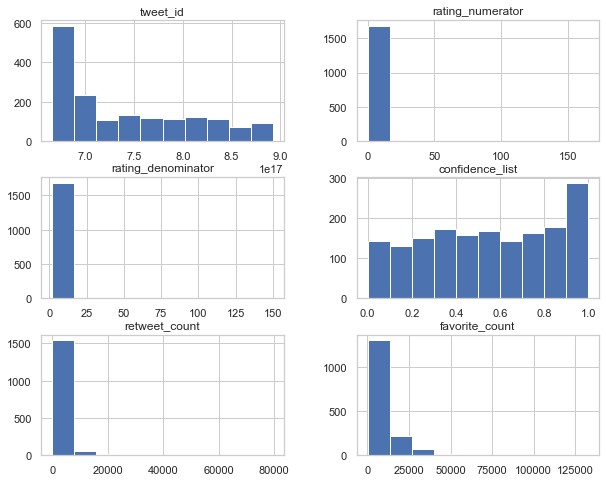

In [138]:
# explore the data.
twitter_archive_database.hist(figsize=(10,8));

In [139]:
twitter_archive_database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1691 non-null   int64  
 1   text                1691 non-null   object 
 2   rating_numerator    1691 non-null   float64
 3   rating_denominator  1691 non-null   int64  
 4   name                1691 non-null   object 
 5   date_tweet          1691 non-null   object 
 6   heure_tweet         1691 non-null   object 
 7   dogs_stage          1691 non-null   object 
 8   jpg_url             1691 non-null   object 
 9   type_dog            1691 non-null   object 
 10  confidence_list     1691 non-null   float64
 11  retweet_count       1626 non-null   float64
 12  favorite_count      1626 non-null   float64
 13  retweeted_status    1626 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 185.1+ KB


### Question de recherche 1 : Quels est le top 10 des type chiens les plus poster ?

In [140]:
# afficher le nombre de chaque type de chien
twitter_archive_database['type_dog'].value_counts()

golden_retriever        158
Labrador_retriever      108
Pembroke                 95
Chihuahua                91
pug                      63
                       ... 
Irish_wolfhound           1
Scotch_terrier            1
Bouvier_des_Flandres      1
silky_terrier             1
clumber                   1
Name: type_dog, Length: 113, dtype: int64

In [141]:
# stocker le nombre de chaque type de chien dans une variable
df_type_dog = twitter_archive_database['type_dog'].value_counts()

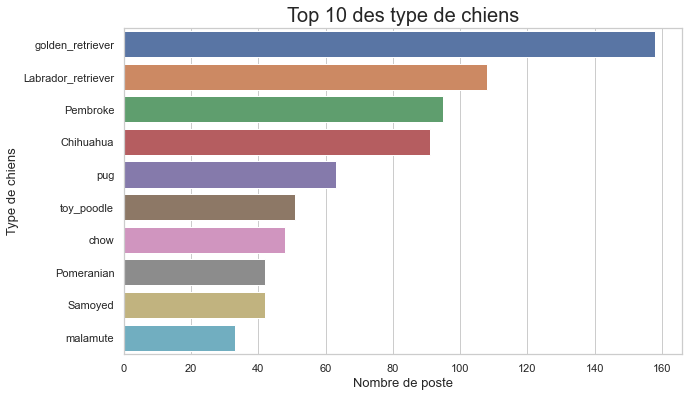

In [142]:
# extraire les 10 meilleurs type de chien avec le nombre de poste.
x = list(df_type_dog.index[:10])
y = list(df_type_dog.values[:10])

ax = sns.barplot(x=y,y=x)
sns.set(rc={'figure.figsize':(12,5)})
ax.set_title("Top 10 des type de chiens",fontsize = 20)
ax.set_xlabel("Nombre de poste",fontsize = 13)
ax.set_ylabel("Type de chiens",fontsize = 13)

sns.set_style("darkgrid")
# sauvegarder une image
plt.savefig('top_10_type.png')

> Comme nous pouvons le voir ci-dessus, le graphique nous montre les types de chiens les plus affichés.
> Dont la race golden retriever est la race la plus affichée suivie du labrador retriever et du pembroke.

### Question de recherche 2 : Quel mois ou il y a le plus grand nombre de tweete de toutes les années ?

In [143]:
# convertisser date_tweet en datetime et garder les moi dans une variable
twitter_archive_database['date_tweet'] = pd.to_datetime(twitter_archive_database['date_tweet'])
number_of_release = twitter_archive_database.date_tweet.dt.month.value_counts().sort_index()
number_of_release

1     202
2     155
3     152
4      84
5      83
6     109
7     129
8      47
9      57
10     56
11    278
12    339
Name: date_tweet, dtype: int64

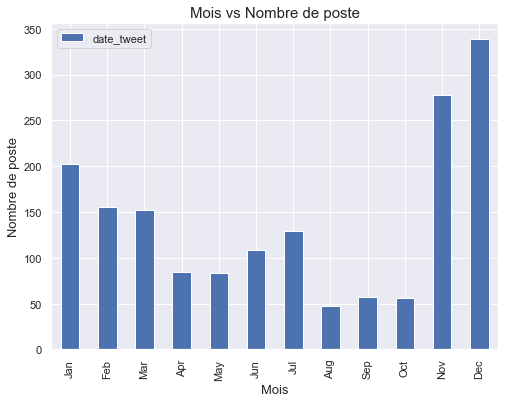

In [144]:
# Creer une liste de mois
# realiser le graph
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
number_of_release = pd.DataFrame(number_of_release)
number_of_release['month'] = months

number_of_release.plot(x='month',kind='bar',fontsize = 11,figsize=(8,6))
#set the labels and titles of the plot.
plt.title('Mois vs Nombre de poste',fontsize = 15)
plt.xlabel('Mois',fontsize = 13)
plt.ylabel('Nombre de poste',fontsize = 13)
# sauvegarder une image
plt.savefig('Mois_vs_Nombre_de_poste.png')

> Comme nous pouvons le voir ci-dessus, le mois ou il y a le plus de poste est le mois de Décembre

### Question de recherche 3 : le nombre de type de chiens posté peut-il affecter sa note ?

In [145]:
# calculer la note des chiens
twitter_archive_database['rating'] = 10 * twitter_archive_database['rating_numerator'] / twitter_archive_database['rating_denominator']
twitter_archive_database.head(1)

,tweet_id,text,rating_numerator,rating_denominator,name,date_tweet,heure_tweet,dogs_stage,jpg_url,type_dog,confidence_list,retweet_count,favorite_count,retweeted_status,rating
0,667550904950915073,RT @dogratingrating: Exceptional talent. Origi...,12.0,10,None,2015-11-20,03:51:52,None,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,vizsla,0.000081,NaN,NaN,NaN,12.0


In [146]:
#compter le nombre de chien par type de chien
df_type_dog_count = twitter_archive_database.groupby('type_dog').count()
#calculer la moyenne de chien par type de chien
df_type_dog_mean = twitter_archive_database.groupby('type_dog').mean()
type_dog_count = df_type_dog_count['rating']
type_dog_mean = df_type_dog_mean['rating']
# creer un dataframe df_rating
df_rating = pd.DataFrame()
df_rating['type_dog_count'] = type_dog_count
df_rating['type_dog_mean'] = type_dog_mean
df_rating[df_rating['type_dog_count']== 1]

,type_dog_count,type_dog_mean
type_dog,,
Bouvier_des_Flandres,1,13.00
EntleBucher,1,11.00
Irish_wolfhound,1,11.00
Japanese_spaniel,1,5.00
Scotch_terrier,1,9.00
clumber,1,11.27
silky_terrier,1,12.00
standard_schnauzer,1,12.00


corélation entre la note et le type de chien :  0.15699230412398343


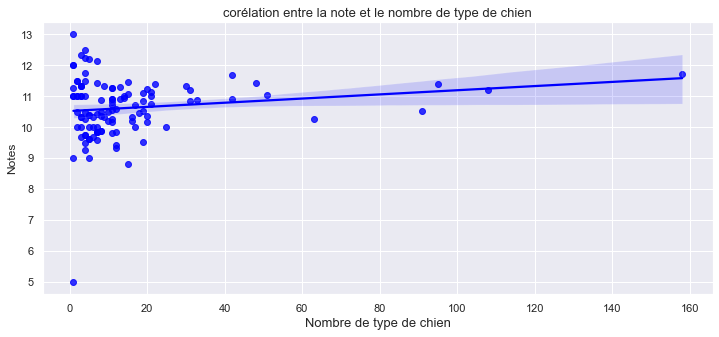

In [147]:
# réaliser le graph
ax = sns.regplot(x=df_rating['type_dog_count'],y=df_rating['type_dog_mean'],color='blue')

ax.set_title("corélation entre la note et le nombre de type de chien",fontsize=13)
ax.set_xlabel("Nombre de type de chien",fontsize=13)
ax.set_ylabel("Notes",fontsize=12)

sns.set(rc={'figure.figsize':(10,6)})
sns.set_style("whitegrid")

#trouver la corélation
data_corr = df_rating.corr()

print("corélation entre la note et le type de chien : ",data_corr.loc['type_dog_count','type_dog_mean'])
# sauvegarder une image
plt.savefig('corelation.png')

> Comme nous pouvons le voir ci-dessus, le graph nous montre une corélation linéaire,se qui signifie que le nombre de type de chien posté n'a pas d'effet sur la note.

<a id='conclusions'></a>
## Conclusions

> En conclusion, après avoire effectué notre analyse dans cet ensemble de données de l’archive de tweets de l’utilisateur de Twitter @dog_rates, nous pouvons constater que 
> le type de chien le plus affichés par l’utilisateur est la race golden retriever.

> ensuite , nous pouvons constater que le mois ou il publie le plus est le mois de Décembre.

> Enfin,nous pouvons constater que le nombre de type de chien posté n'a pas d'effet sur les note.

> Mais, Cet ensemble de données n'est pas vraiment une représentation efficace de l’archive de tweets de l’utilisateur de Twitter @dog_rates en raison du grand nombre de valeurs manquantes, ces valeurs erronées dans l'ensemble de données.


# <a id='reference'></a>
## reference

> Livre : python Data Analytics with pandas, numpy, and matplotlib second edition Fabio Nelli

> site web : 

- https://pandas.pydata.org/docs/reference/ , 
- https://matplotlib.org/stable/tutorials/introductory/pyplot.html
- https://video.udacity-data.com/topher/2018/November/5be5fb4c_twitter-api/twitter-api.py
